<a href="https://colab.research.google.com/github/prabhkaur301/ML-notebooks/blob/main/Copy_of_Social_Media_Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [5]:
tds = pd.read_csv("/content/drive/MyDrive/Major project/True.csv")
fds = pd.read_csv("/content/drive/MyDrive/Major project/Fake.csv")

In [6]:
tds

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [7]:
class_true = ["Real"]*21417
tds["class_label"] = class_true
tds

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real


In [8]:
fds

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:
class_fake = ["Fake"]*23481
fds["class_label"] = class_fake
fds

,title,text,subject,date,class_label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [10]:
# Preprocessing

tweets_dataset = pd.concat([tds,fds], axis=0)
index = [i for i in range(len(tweets_dataset))]
tweets_dataset["index"] = index
tweets_dataset.set_index('index',inplace=True)

for i in range(len(tweets_dataset["text"])):
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('|', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('?', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace(':', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace(';', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace("'", '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('"', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace(',', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('.', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('(', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace(')', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('\n', '')
  tweets_dataset["text"][i]=tweets_dataset["text"][i].replace('&', '')

tweets_dataset
"""
stop_words = stopwords.words("english")
stop_words.extend(["-","(",")",",",";",".",":","'","?","|","\n","&"])
print(stop_words)
tti=[word_tokenize(tds['title'][i])]
ttx=[word_tokenize(tds['text'][i])]
"""

'\nstop_words = stopwords.words("english")\nstop_words.extend(["-","(",")",",",";",".",":","\'","?","|","\n","&"])\nprint(stop_words)\ntti=[word_tokenize(tds[\'title\'][i])]\nttx=[word_tokenize(tds[\'text\'][i])]\n'

In [11]:
tweets_dataset = tweets_dataset.sample(frac=1)#shuffled dataset
tweets_dataset

,title,text,subject,date,class_label
index,,,,,
32321,PRESIDENT TRUMP WARNS Comey…Tweets Veiled Thre...,Donald Trump lobbed a veiled threat at the for...,politics,"May 12, 2017",Fake
32174,BOOM! HARRIS FAULKNER Blows Up The Russia Coll...,Fox News Harris Faulkner BLOWS UP the WHOLE R...,politics,"May 29, 2017",Fake
15075,North Korea says Trump begged for a war during...,SEOUL Reuters - North Korea said on Saturday t...,worldnews,"November 11, 2017",Real
30731,JUST IN: JOHN CONYERS’ Attorney Suggests Nancy...,Apparently the arrogant 88-year-old Congressma...,politics,"Nov 30, 2017",Fake
16984,Putin says doubts U.S. strike on North Korea w...,SOCHI Russia Reuters - Russian President Vladi...,worldnews,"October 19, 2017",Real
...,...,...,...,...,...
38379,BREAKING: Major Health Insurance Carrier May P...,It turns out the words affordable and care ...,Government News,"Nov 19, 2015",Fake
40478,BARACK AND MICHELLE Reportedly Offered $60 MIL...,It was just announced today that the Obama s a...,left-news,"Feb 28, 2017",Fake
23429,WATCH: Fox Host Declares GOP Trumpcare Failur...,President Obama has finally been vindicated af...,News,"March 24, 2017",Fake


In [12]:
tweets_dataset.class_label.value_counts()

Fake    23481
Real    21417
Name: class_label, dtype: int64

In [13]:
tweets_dataset["class_label_num"] = tweets_dataset["class_label"].map({"Fake":0,"Real":1})
tweets_dataset

,title,text,subject,date,class_label,class_label_num
index,,,,,,
32321,PRESIDENT TRUMP WARNS Comey…Tweets Veiled Thre...,Donald Trump lobbed a veiled threat at the for...,politics,"May 12, 2017",Fake,0
32174,BOOM! HARRIS FAULKNER Blows Up The Russia Coll...,Fox News Harris Faulkner BLOWS UP the WHOLE R...,politics,"May 29, 2017",Fake,0
15075,North Korea says Trump begged for a war during...,SEOUL Reuters - North Korea said on Saturday t...,worldnews,"November 11, 2017",Real,1
30731,JUST IN: JOHN CONYERS’ Attorney Suggests Nancy...,Apparently the arrogant 88-year-old Congressma...,politics,"Nov 30, 2017",Fake,0
16984,Putin says doubts U.S. strike on North Korea w...,SOCHI Russia Reuters - Russian President Vladi...,worldnews,"October 19, 2017",Real,1
...,...,...,...,...,...,...
38379,BREAKING: Major Health Insurance Carrier May P...,It turns out the words affordable and care ...,Government News,"Nov 19, 2015",Fake,0
40478,BARACK AND MICHELLE Reportedly Offered $60 MIL...,It was just announced today that the Obama s a...,left-news,"Feb 28, 2017",Fake,0
23429,WATCH: Fox Host Declares GOP Trumpcare Failur...,President Obama has finally been vindicated af...,News,"March 24, 2017",Fake,0


In [14]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import spacy
spacy.cli.download("en_core_web_lg")
nlp = spacy.load("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [16]:
#nlp("Rohit Sharma's Team India will face Jos Buttler-led England in the second semifinal of the ICC men’s T20 World Cup 2022 at the Adelaide Oval on Thursday (November 10).\n Fans are hoping for a India vs Pakistan final, with Babar Azam's side already in the final after win over New Zealand on Wednesday (November 9). \nRohit Sharma’s side topped Super 12 Group 2 table with four wins in five games, their only loss coming against South Africa at Perth.\n\nEngland, on the other hand, finished second in Super 12 Group 1, losing to Ireland and their game against Australia was washed out without a ball being bowled.").vector

In [17]:
tweets_dataset["text_vec"]=tweets_dataset["text"].apply(lambda text: nlp(text).vector)
tweets_dataset

,title,text,subject,date,class_label,class_label_num,text_vec
index,,,,,,,
32321,PRESIDENT TRUMP WARNS Comey…Tweets Veiled Thre...,Donald Trump lobbed a veiled threat at the for...,politics,"May 12, 2017",Fake,0,"[-1.4156905, 1.5914484, -2.2795136, 0.5203304,..."
32174,BOOM! HARRIS FAULKNER Blows Up The Russia Coll...,Fox News Harris Faulkner BLOWS UP the WHOLE R...,politics,"May 29, 2017",Fake,0,"[-1.6161176, 0.8837902, -1.7978565, 0.41728497..."
15075,North Korea says Trump begged for a war during...,SEOUL Reuters - North Korea said on Saturday t...,worldnews,"November 11, 2017",Real,1,"[-1.7166573, 0.89270365, -2.1822834, 1.0517973..."
30731,JUST IN: JOHN CONYERS’ Attorney Suggests Nancy...,Apparently the arrogant 88-year-old Congressma...,politics,"Nov 30, 2017",Fake,0,"[-1.8766922, 0.7683398, -1.4834276, 0.2567152,..."
16984,Putin says doubts U.S. strike on North Korea w...,SOCHI Russia Reuters - Russian President Vladi...,worldnews,"October 19, 2017",Real,1,"[-1.5672952, 1.1076462, -2.0297544, 2.2400506,..."
...,...,...,...,...,...,...,...
38379,BREAKING: Major Health Insurance Carrier May P...,It turns out the words affordable and care ...,Government News,"Nov 19, 2015",Fake,0,"[-1.7003309, 1.4954909, -2.51324, 0.660221, 4...."
40478,BARACK AND MICHELLE Reportedly Offered $60 MIL...,It was just announced today that the Obama s a...,left-news,"Feb 28, 2017",Fake,0,"[-1.9056445, 0.3276947, -2.2769153, -0.0448511..."
23429,WATCH: Fox Host Declares GOP Trumpcare Failur...,President Obama has finally been vindicated af...,News,"March 24, 2017",Fake,0,"[-1.9424002, 1.4689258, -2.4135377, 0.75186527..."


In [18]:
tweets_dataset["text_vec"]

index
32321    [-1.4156905, 1.5914484, -2.2795136, 0.5203304,...
32174    [-1.6161176, 0.8837902, -1.7978565, 0.41728497...
15075    [-1.7166573, 0.89270365, -2.1822834, 1.0517973...
30731    [-1.8766922, 0.7683398, -1.4834276, 0.2567152,...
16984    [-1.5672952, 1.1076462, -2.0297544, 2.2400506,...
                               ...                        
38379    [-1.7003309, 1.4954909, -2.51324, 0.660221, 4....
40478    [-1.9056445, 0.3276947, -2.2769153, -0.0448511...
23429    [-1.9424002, 1.4689258, -2.4135377, 0.75186527...
3389     [-2.3128839, 0.7020976, -1.9358621, 1.3802773,...
37655    [-2.5922554, 0.71210253, -1.9447421, 1.4100453...
Name: text_vec, Length: 44898, dtype: object

In [19]:
#tweets_dataset["text_vec"].to_csv("/content/drive/MyDrive/Fake_News_Detection/TweetsDataset.csv", index=False)
#tweetdata = pd.read_csv("/content/drive/MyDrive/Fake_News_Detection/TweetsDataset.csv")
#tweetdata["text_vec"][0]

In [20]:
tweet_train, tweet_test, label_train, label_test = train_test_split(tweets_dataset.text_vec.values, tweets_dataset.class_label_num, test_size=0.2, random_state=2022)

In [21]:
tweet_train_2D = np.stack(tweet_train)
tweet_test_2D = np.stack(tweet_test)


In [22]:
"""
https://www.researchgate.net/post/what_are_the_different_algorithms_for_text_classification

Some Traditional ML Algorithms:
Logisitic Regression, Multinomial Naive Bayes, k Nearest Neighbors, Decision Tree and Support Vector Machine
Some Ensemble ML Algorithms are:
Adaboost, Random Forest, Bagging, Gradient Boosting etc
deep learning ones: 
Convolutional Neural Network (CNN), Long Short Term Modelr (LSTM), Recurrent Convolutional Neural Network (RCNN), etc
"""

'\nhttps://www.researchgate.net/post/what_are_the_different_algorithms_for_text_classification\n\nSome Traditional ML Algorithms:\nLogisitic Regression, Multinomial Naive Bayes, k Nearest Neighbors, Decision Tree and Support Vector Machine\nSome Ensemble ML Algorithms are:\nAdaboost, Random Forest, Bagging, Gradient Boosting etc\ndeep learning ones: \nConvolutional Neural Network (CNN), Long Short Term Modelr (LSTM), Recurrent Convolutional Neural Network (RCNN), etc\n'

In [23]:
mnb = MultinomialNB()
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(tweet_train_2D) #Negative values in data passed to MultinomialNB (input X)
scaled_test = scaler.transform(tweet_test_2D)
mnb.fit(scaled_train, label_train) # scaled to get positive range of numbers for pos & neg data

MultinomialNB()

In [24]:
label_pred = mnb.predict(scaled_test)
print(classification_report(label_test, label_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      4705
           1       0.85      0.90      0.88      4275

    accuracy                           0.88      8980
   macro avg       0.88      0.88      0.88      8980
weighted avg       0.88      0.88      0.88      8980



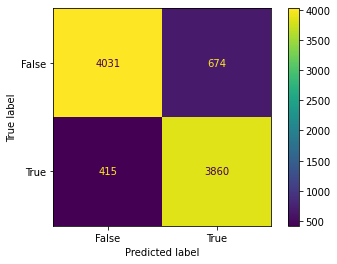

In [25]:
confusion_matrix = confusion_matrix(label_test, label_pred)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(tweet_train_2D, label_train)

KNeighborsClassifier(metric='euclidean')

In [27]:
label_pred_knn = knn.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_knn))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4705
           1       0.97      0.96      0.97      4275

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [28]:
confusion_matrix = confusion_matrix(label_test, label_pred_knn)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

TypeError: ignored

In [ ]:
#lr = LogisticRegression()
#lr.fit(tweet_train_2D, label_train) #ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [33]:
sv = svm.SVC()
sv.fit(tweet_train_2D, label_train)

KeyboardInterrupt: ignored

In [31]:
label_pred_sv = sv.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_sv))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4705
           1       0.98      0.99      0.98      4275

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [32]:
confusion_matrix = confusion_matrix(label_test, label_pred_sv)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

TypeError: ignored

In [34]:
randfor = RandomForestClassifier(max_depth=14, random_state=2022) # at max_depth 14, acc is max, no inc after that
#The random_state in these algorithms controls two randomized processes — bootstrapping of the samples when creating tress and getting a random subset of features to search for the best feature during the node splitting process when creating each tree.
randfor.fit(tweet_train_2D, label_train)

RandomForestClassifier(max_depth=14, random_state=2022)

In [35]:
label_pred_randfor = randfor.predict(tweet_test_2D)
print(classification_report(label_test, label_pred_randfor))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4705
           1       0.97      0.97      0.97      4275

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



In [36]:
confusion_matrix = confusion_matrix(label_test, label_pred_randfor)

cm_display= ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

TypeError: ignored

In [37]:
!pip install lazypredict
!pip install scipy==1.7.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.5 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [38]:
#cloning the model
!git clone https://github.com/shankarpandala/lazypredict.git

Cloning into 'lazypredict'...
remote: Enumerating objects: 902, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 902 (delta 184), reused 170 (delta 170), pack-reused 679
Receiving objects: 100% (902/902), 179.37 KiB | 12.81 MiB/s, done.
Resolving deltas: 100% (501/501), done.


In [2]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [3]:
# Defining parameters for lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(tweet_train_2D, tweet_train_2D, label_train, label_train)
models_test,predictions_test = clf.fit(tweet_train_2D, tweet_test_2D, label_train, label_test)

NameError: ignored